# SVM - TikTok

In [1]:
import sys
import os
import pandas as pd

# Agregar el directorio raiz al PYTHONPATH
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

Importar modelo de SVM para entrenarlo

In [2]:
from src.trainers.utils import build_datasets
from constants.constants_tiktok import TIKTOK_DATASET_SENTENCES

dataset_train, dataset_test, dataset_val = build_datasets(
    TIKTOK_DATASET_SENTENCES,
    test_size=0.2, # 20% de 100%
    val_size=0.5, # 50% de 20%
    random_state=42,
    undersampling=True
)
print(dataset_train.shape)
print(dataset_test.shape)
print(dataset_val.shape)

Train: 23.22%
Test: 2.90%
Val: 2.90%
(15688, 2)
(1961, 2)
(1962, 2)


In [12]:
import numpy as np

list_kernel = ["linear", "rbf"]
list_vectorizers = ["tfidf", "bow"]
list_C = np.logspace(-2, 0.5, 5) 
print(list_C)

[0.01       0.04216965 0.17782794 0.74989421 3.16227766]


## Entrenar modelos

In [5]:
from src.trainers.train_svm import train_svm
from src.trainers.utils import save_model, save_metrics
from constants.constants_tiktok import TIKTOK_SVM_METRICS_PATH, SVM_PIPELINE_PATH

best_accuracy = -1
for vectorizer in list_vectorizers:
    for kernel in list_kernel:
        for C in list_C:
            pipeline, metrics = train_svm(
                dataset_train, dataset_val,
                C=C, kernel=kernel, vec=vectorizer
            )
            print(f"[SVM {vectorizer} {kernel} {C:.2f}] acc: {metrics['accuracy']:,4f}")
            save_metrics(metrics, TIKTOK_SVM_METRICS_PATH) # Guardar Pipeline
            if metrics['accuracy'] > best_accuracy:
                best_accuracy = metrics['accuracy']
                save_model(pipeline, SVM_PIPELINE_PATH)

c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM tfidf linear 0.01: 0.3705402650356779
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\svm_pipeline.pkl
SVM tfidf linear 0.042169650342858224: 0.5203873598369011
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\svm_pipeline.pkl
SVM tfidf linear 0.1778279410038923: 0.6411824668705403
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\svm_pipeline.pkl
SVM tfidf linear 0.7498942093324559: 0.682466870540265
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\svm_pipeline.pkl
SVM tfidf linear 3.1622776601683795: 0.6880733944954128
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\svm_pipeline.pkl


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM tfidf rbf 0.01: 0.3333333333333333
SVM tfidf rbf 0.042169650342858224: 0.48063200815494395
SVM tfidf rbf 0.1778279410038923: 0.5851172273190621
SVM tfidf rbf 0.7498942093324559: 0.6661569826707442
SVM tfidf rbf 3.1622776601683795: 0.6906218144750255
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\svm_pipeline.pkl
SVM bow linear 0.01: 0.5504587155963303
SVM bow linear 0.042169650342858224: 0.6452599388379205
SVM bow linear 0.1778279410038923: 0.6875637104994903
SVM bow linear 0.7498942093324559: 0.6977573904179408
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\svm_pipeline.pkl
SVM bow linear 3.1622776601683795: 0.6931702344546381


c:\Users\Diego\anaconda3\envs\tensorflow_pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM bow rbf 0.01: 0.36850152905198774
SVM bow rbf 0.042169650342858224: 0.4648318042813456
SVM bow rbf 0.1778279410038923: 0.5856269113149847
SVM bow rbf 0.7498942093324559: 0.6513761467889908
SVM bow rbf 3.1622776601683795: 0.68144750254842


## Modelo con mayor accuracy

In [6]:
# Seleccionar los hiperparámetros que generan mayor accuracy
df_metrics = pd.read_csv(TIKTOK_SVM_METRICS_PATH)

best_acc = df_metrics.loc[df_metrics['accuracy'].idxmax()]
display(best_acc)

accuracy           0.697757
recall             0.697757
precision          0.702389
f1_score            0.69949
model                   SVM
vectorizer              BOW
regularization     0.749894
kernel               LINEAR
vocab_size             9466
train_time        21.524396
Name: 13, dtype: object

Cargando modelo: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\classifiers\svm_pipeline.pkl

Support Vector Machine
Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.70      0.74      0.71       617
           1       0.68      0.61      0.64       719
           2       0.75      0.78      0.76       625

    accuracy                           0.71      1961
   macro avg       0.71      0.71      0.71      1961
weighted avg       0.70      0.71      0.70      1961

Matriz de confusión


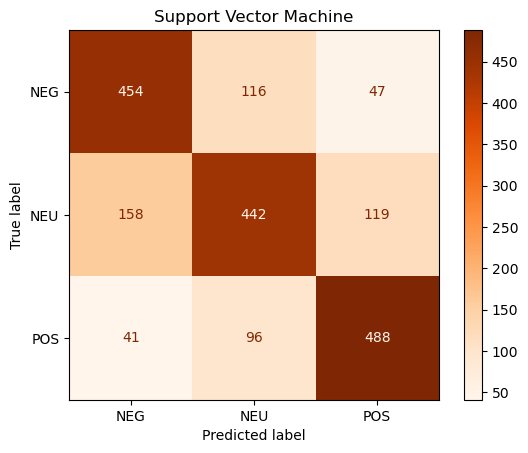

{'accuracy': 0.7057623661397247,
 'recall': 0.705757009520866,
 'precision': 0.710453724897041,
 'f1_score': 0.7073007974646255}

In [7]:
from src.trainers.utils import load_model
from src.trainers.utils import evaluate_model

# Evaluar modelo con datos de prueba
pipeline = load_model(SVM_PIPELINE_PATH)
metrics = evaluate_model(pipeline, dataset_test, title="Support Vector Machine")
display(metrics)

## Test

In [13]:
from constants.constants_nlp import INDEX_TO_POLARITY
from src.preprocesamiento.clean import clean_text
from src.preprocesamiento.nlp_spacy import preprocesamiento

textos_test = ["Hola! cómo estás???😀","el dia de hoy estoy feliz y contento", "estoy muy triste", "Me encuentro estudiando para un exámen", "A veces me encuentro triste, pero la mayoria del tiempo estoy muy feliz"]
textos_test = list(map(lambda x: clean_text(x), textos_test))
textos_test = preprocesamiento(textos_test)

preds = pipeline.predict(textos_test)
for input, pred in zip(textos_test,preds):
    print(f"{input}: {INDEX_TO_POLARITY[pred]}")

Modelo cargado: es_core_news_sm
Aplicando stemming...
Total de documentos preprocesados: 5
hol estar: NEU
feliz content: POS
trist: NEG
encontr estudi exam: NEU
encontr trist mayor tiemp feliz: NEG
